In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('data/data_set.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
# float to int covert

float_cols = ['Age' , 'Height' , 'Weight' , 'FCVC' , 'NCP' , 'CH2O','FAF','TUE']

for col in float_cols:
    df[col]=df[col].astype('int')

In [7]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# Exploring the Data & Clean Up

In [8]:
# Segregate Numerical columns and categorical columns

numerical_cols = []
categorical_cols = []

for col in df.columns:
    if df[col].dtype == "O":
        categorical_cols.append(col)
        
    else:
        numerical_cols.append(col)
        
    

In [9]:
numerical_cols

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [10]:
categorical_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [11]:
# Check unique value in each columns

for col in df.columns:
    print(df[col].unique())
    print('-------------------------------------------------------------------------------')

['Female' 'Male']
-------------------------------------------------------------------------------
[21 23 27 22 29 24 26 41 30 52 20 19 31 39 17 25 55 38 18 15 61 44 34 36
 32 35 40 45 33 51 56 28 16 37 14 42 50 43 46 47]
-------------------------------------------------------------------------------
[1]
-------------------------------------------------------------------------------
[ 64  56  77  87  89  53  55  68 105  80  99  60  66 102  78  82  70  50
  65  52  76  83  90  62  49  48  67  88  75  72  54  44  58  57  69  95
 112  85  45  91  93  84  42  63  51  86  61 109  59  94 130  79  96  98
  74 118  40  71 100  73 114 121 120  47  81 115 107 110 173  97 125  92
 108  39 113 104 126 137 165 133 111  43  41  46 101 106 103 116 117 128
 122 129 124 119 123 127 149 131 152 132 142 135 138 155 141 151 144 154
 160 136 140 134 153 147 150]
-------------------------------------------------------------------------------
['yes' 'no']
------------------------------------------------------

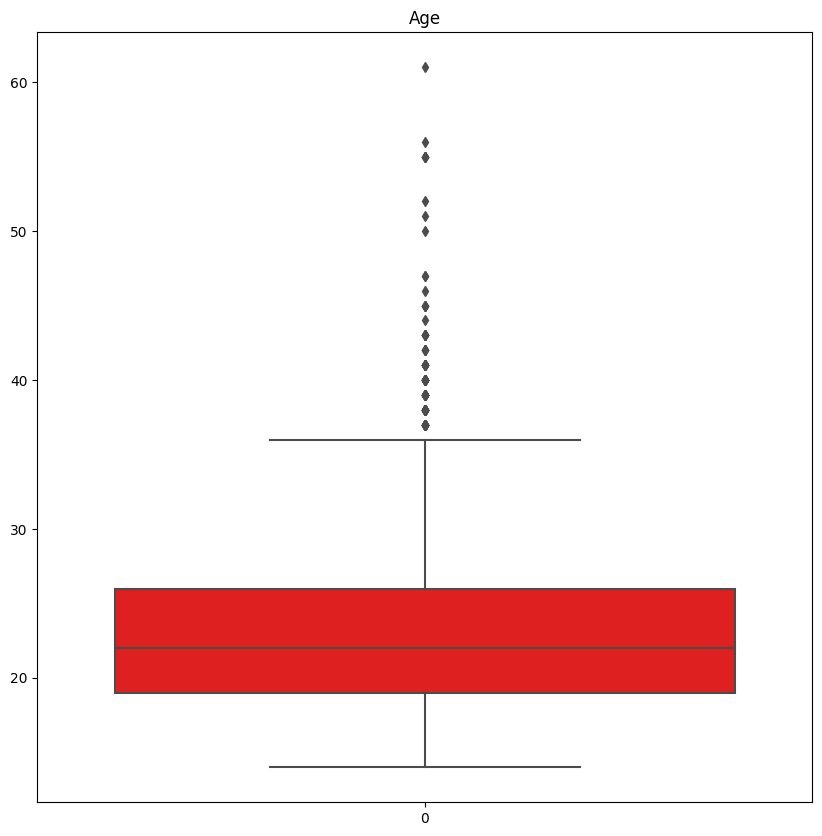

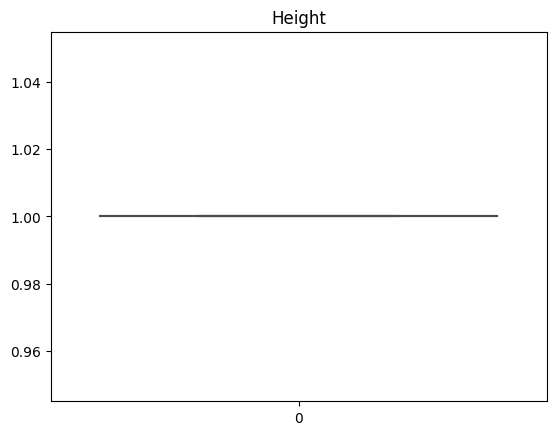

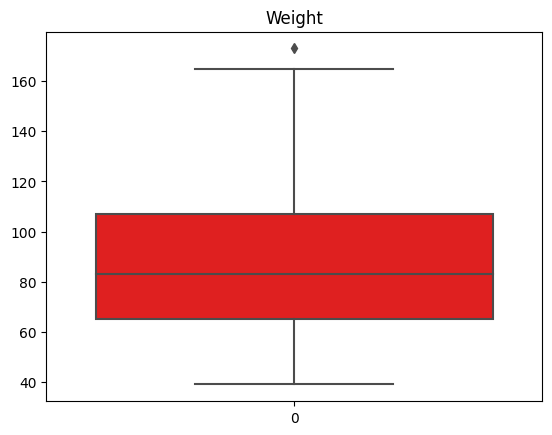

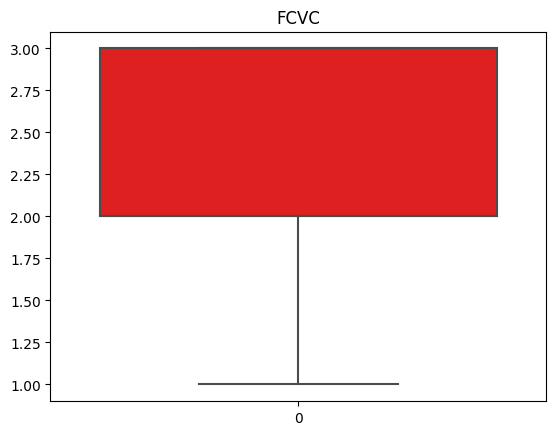

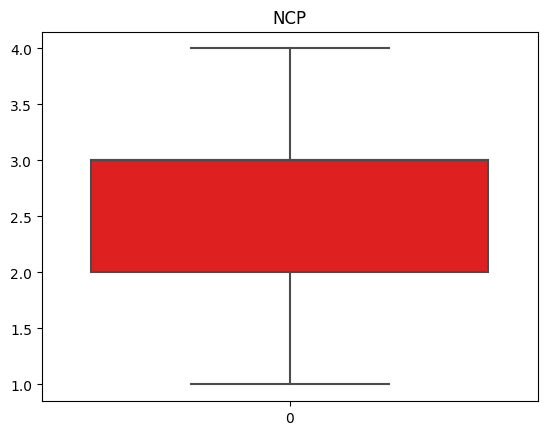

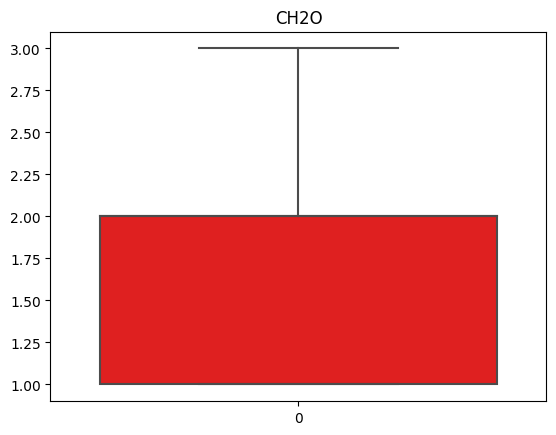

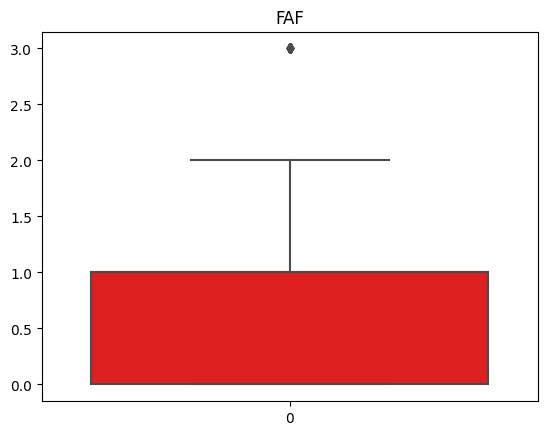

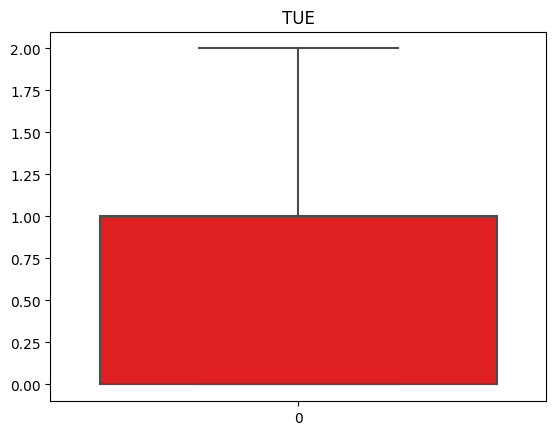

In [12]:
# find out outliers in numerical_cols 
plt.figure(figsize=(10,10))
for col in numerical_cols:
    plt.title(col)
    sns.boxplot(df[col] , color = 'red')
    print(" ")
    plt.show()


# Observation
### Outliers in Age columns and NCP columns

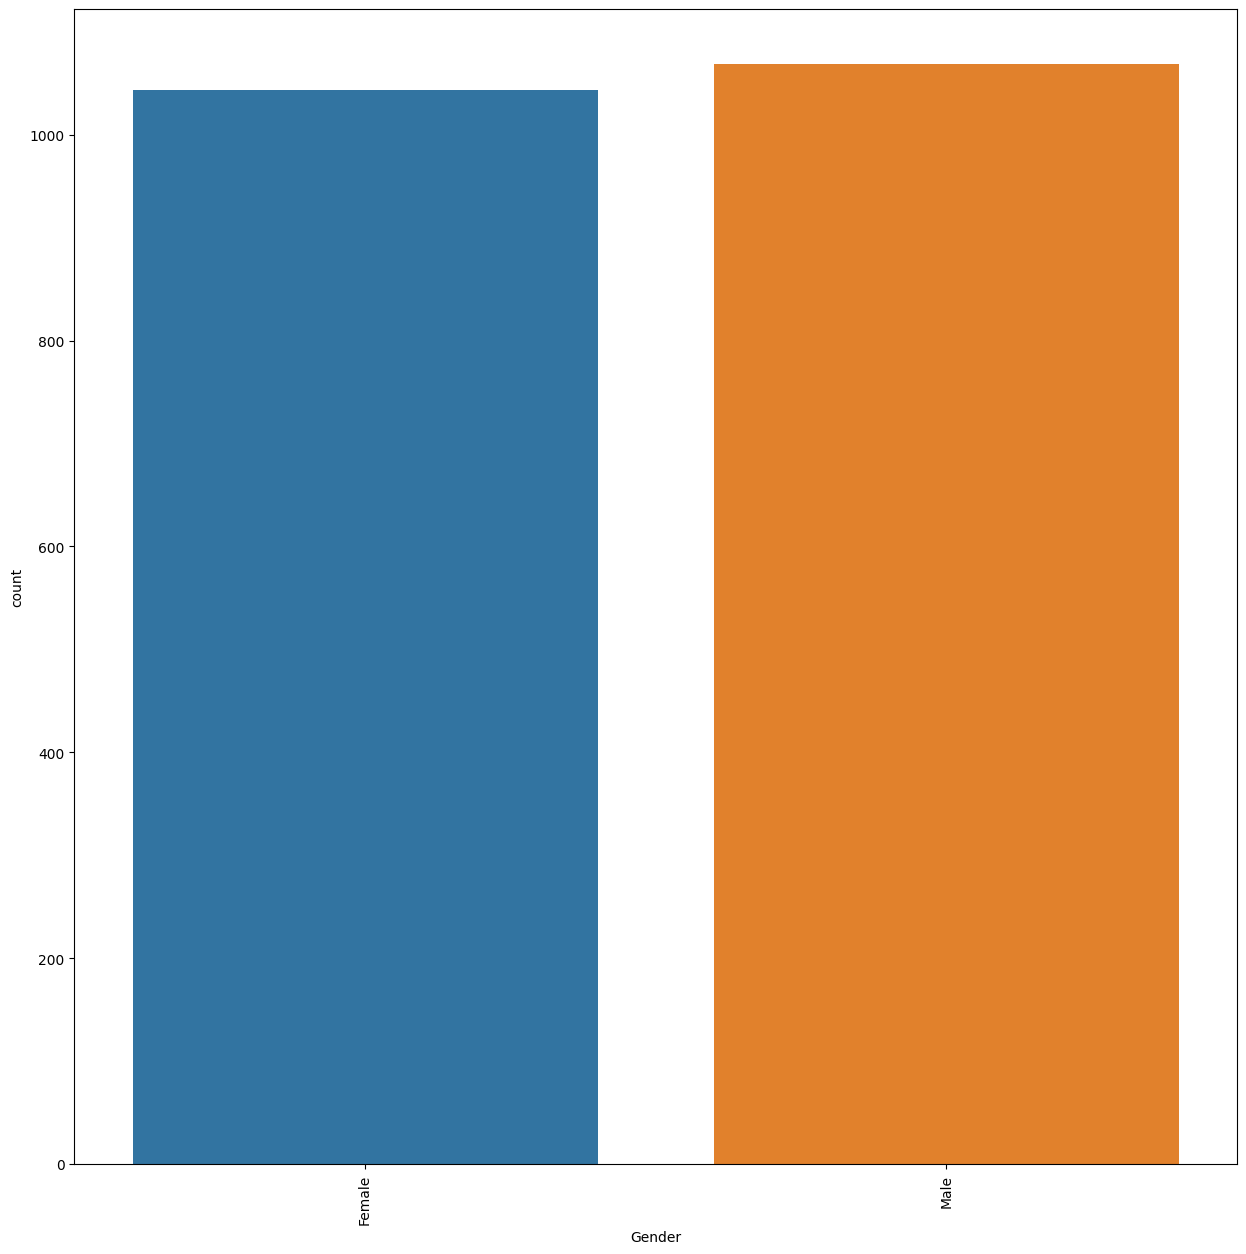

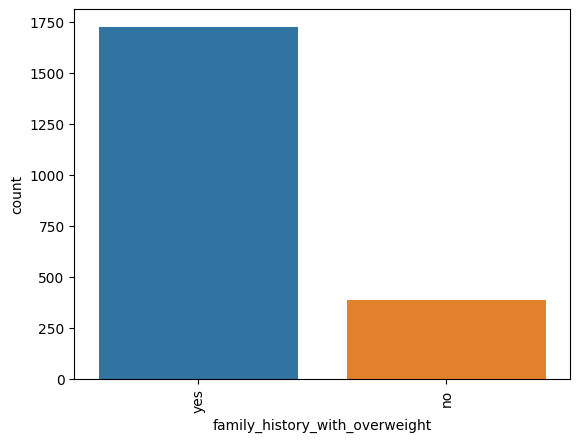

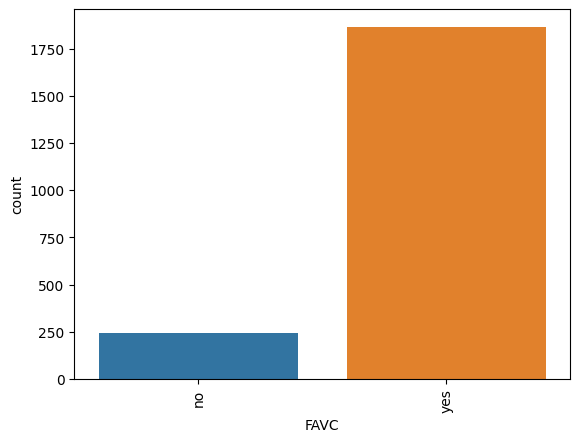

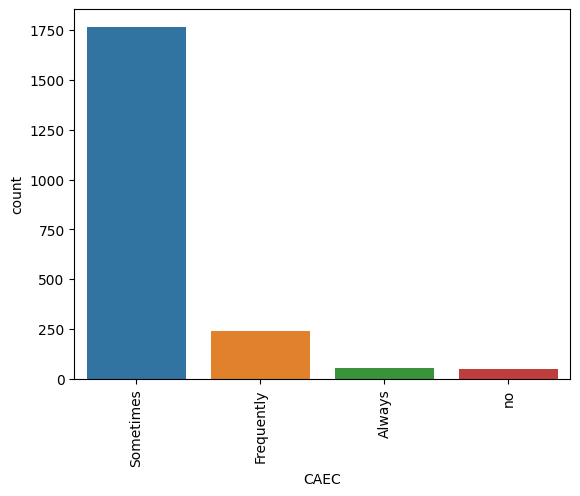

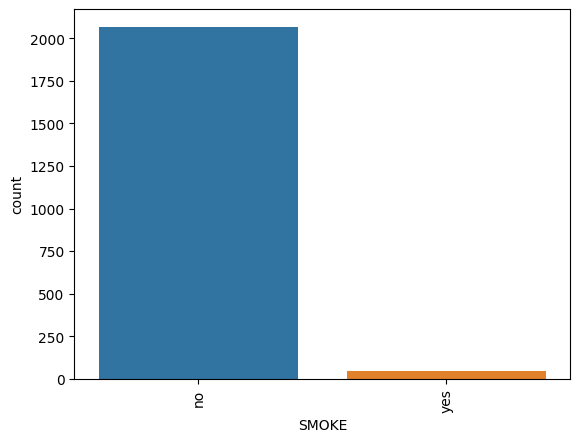

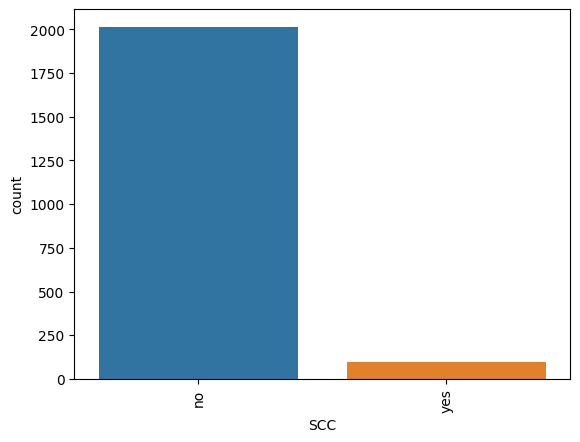

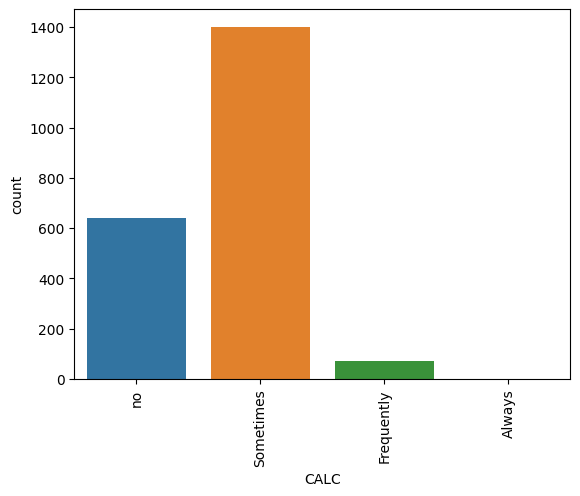

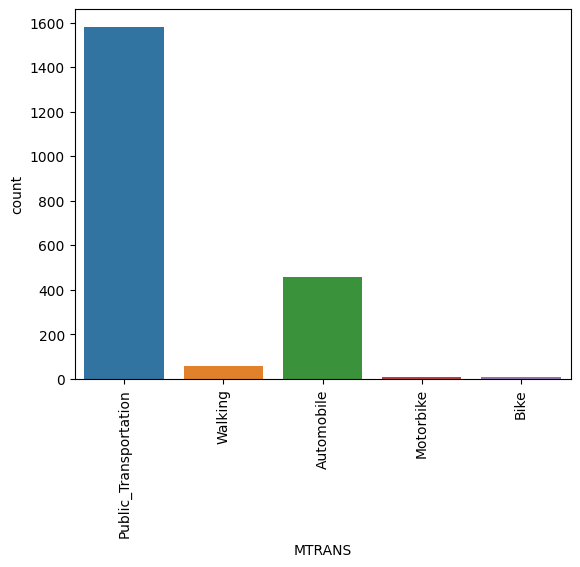

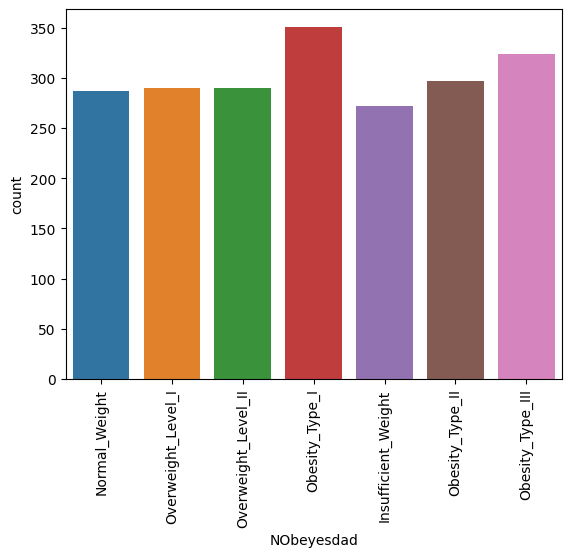

In [13]:
# count plot for categorical columns
plt.figure(figsize=(15,15))

for col in categorical_cols:
    sns.countplot(x=df[col])
    plt.xticks(rotation = 90)
    plt.show()

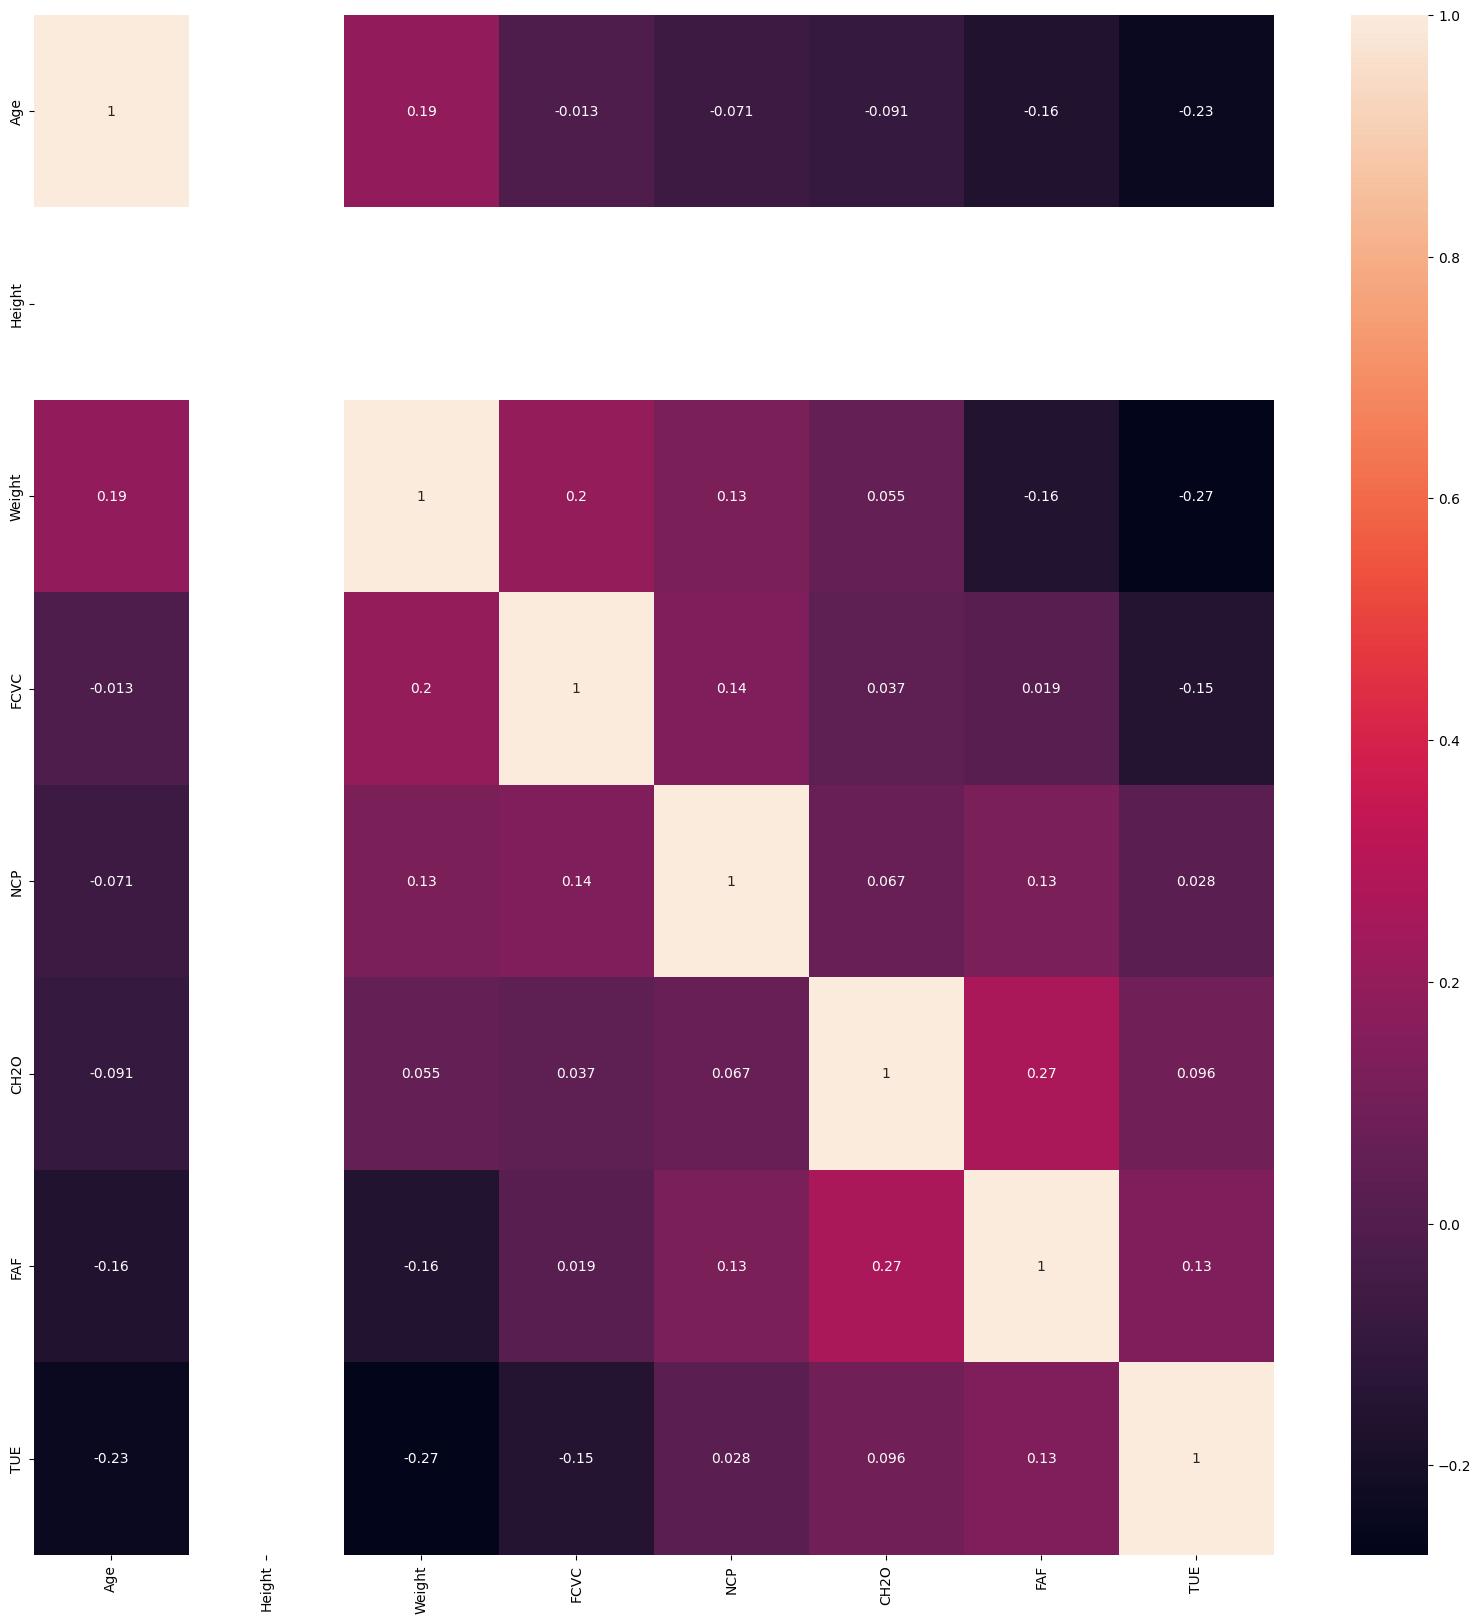

In [14]:
#  Create correlation

plt.figure(figsize = (20,20))
sns.heatmap(df[numerical_cols].corr() , annot = True)
plt.xticks(rotation = 90)
plt.show()